* Name: Nileem Kaveramma C C
* Roll number: 2348441

* **Sparse Vector** in the Context of Embeddings:
In the context of machine learning and natural language processing (NLP), sparse embeddings refer to representations where a word or an entity is represented by a high-dimensional vector, where most of the dimensions are zero. A common use of sparse embeddings is in one-hot encoding or bag-of-words (BoW) representations.

Key Points about Sparse Embeddings:
* **One-Hot Encoding**: In NLP, a sparse embedding might be a one-hot encoded vector, where each unique word in a vocabulary is represented by a vector that is zero in all positions except for one, which is set to 1. For example, in a vocabulary of 10,000 words
* **Bag-of-Words (BoW):** Another common use of sparse embeddings is in BoW models, where a document is represented by a sparse vector of word counts, with many words not appearing in the document having a count of zero.



a) Consider the table of term frequencies for 3 documents denoted Doc1, Doc2, Doc3 in the given table.
* Compute the tf-idf weights for the terms car, auto, insurance, best, for each document, using the idf
values and calculate the score for any user query q. [example query: “car insurance”, “best car” ]

**Term Frequency (TF):**

Measures how frequently a word appears in a document relative to the total number of words in that document.
* **Inverse Document Frequency (IDF):**

Measures how common or rare a word is across all documents in a corpus. If a word appears in many documents, its IDF value decreases, as it is considered less informative.

In [ ]:
import math
from collections import defaultdict

# Term frequencies from the table
tf = {
    'Doc1': {'car': 27, 'auto': 3, 'insurance': 0, 'best': 14},
    'Doc2': {'car': 4, 'auto': 33, 'insurance': 33, 'best': 0},
    'Doc3': {'car': 24, 'auto': 0, 'insurance': 29, 'best': 17},
}

# IDF values from the table
idf = {
    'car': 1.65,
    'auto': 2.08,
    'insurance': 1.62,
    'best': 1.5,
}

# Function to calculate tf-idf
def calculate_tf_idf(tf, idf):
    tf_idf = defaultdict(dict)
    for doc, terms in tf.items():
        for term, frequency in terms.items():
            if term in idf:
                tf_idf[doc][term] = frequency * idf[term]
    return tf_idf

# Function to compute score for a query
def compute_query_score(query, tf_idf):
    query_terms = query.split()
    doc_scores = defaultdict(float)

    for doc, terms in tf_idf.items():
        for term in query_terms:
            if term in terms:
                doc_scores[doc] += terms[term]

    return doc_scores

# Calculate tf-idf for each document
tf_idf_weights = calculate_tf_idf(tf, idf)

# Example query
query_1 = "car insurance"
query_2 = "best car"

# Compute scores for the queries
score_query_1 = compute_query_score(query_1, tf_idf_weights)
score_query_2 = compute_query_score(query_2, tf_idf_weights)

# Output results
print("TF-IDF Weights:")
for doc, weights in tf_idf_weights.items():
    print(f"{doc}: {weights}")

print("\nScores for query 'car insurance':", score_query_1)
print("Scores for query 'best car':", score_query_2)


TF-IDF Weights:
Doc1: {'car': 44.55, 'auto': 6.24, 'insurance': 0.0, 'best': 21.0}
Doc2: {'car': 6.6, 'auto': 68.64, 'insurance': 53.46, 'best': 0.0}
Doc3: {'car': 39.599999999999994, 'auto': 0.0, 'insurance': 46.980000000000004, 'best': 25.5}

Scores for query 'car insurance': defaultdict(<class 'float'>, {'Doc1': 44.55, 'Doc2': 60.06, 'Doc3': 86.58})
Scores for query 'best car': defaultdict(<class 'float'>, {'Doc1': 65.55, 'Doc2': 6.6, 'Doc3': 65.1})


Apply Euclidean normalization to the tf values from the question 1 a) and generate a table similar to
the one given below.

In [ ]:
import numpy as np
from collections import defaultdict

# Term frequencies from the previous part (same as before)
tf = {
    'Doc1': {'car': 27, 'auto': 3, 'insurance': 0, 'best': 14},
    'Doc2': {'car': 4, 'auto': 33, 'insurance': 33, 'best': 0},
    'Doc3': {'car': 24, 'auto': 0, 'insurance': 29, 'best': 17},
}

# Function to calculate the Euclidean norm for a document
def euclidean_norm(terms):
    norm = np.sqrt(sum(frequency ** 2 for frequency in terms.values()))
    return norm

# Function to normalize TF using Euclidean norm
def normalize_tf(tf):
    normalized_tf = defaultdict(dict)
    for doc, terms in tf.items():
        norm = euclidean_norm(terms)
        for term, frequency in terms.items():
            normalized_tf[doc][term] = frequency / norm if norm != 0 else 0
    return normalized_tf

# Apply normalization
normalized_tf = normalize_tf(tf)

# Display normalized TF values
print("Euclidean Normalized Term Frequencies:")
for doc, terms in normalized_tf.items():
    print(f"{doc}: {terms}")


Euclidean Normalized Term Frequencies:
Doc1: {'car': 0.8834669878549793, 'auto': 0.09816299865055327, 'insurance': 0.0, 'best': 0.4580939937025819}
Doc2: {'car': 0.08539681625254598, 'auto': 0.7045237340835044, 'insurance': 0.7045237340835044, 'best': 0.0}
Doc3: {'car': 0.5810610014929909, 'auto': 0.0, 'insurance': 0.7021153768040307, 'best': 0.4115848760575352}


Cosine Similarity - Compute the nearest neighbours of a word in a vector space using cosine score.
* a. Collect N documents as input.
* b. Generate a matrix of word embeddings.
* c. Plot a few words to understand the similarity based on the word embedding.
* d. Compute the nearest word of any given word using cosine scores.
* e. Plot all words nearest to a given word x.
* Eg: man : king = woman : X

[==================================================] 100.0% 128.1/128.1MB downloaded
Nearest neighbors of 'man': [('woman', 0.8323495), ('boy', 0.79148716), ('one', 0.7788749), ('person', 0.7526817), ('another', 0.7522236)]
man : king = woman : king


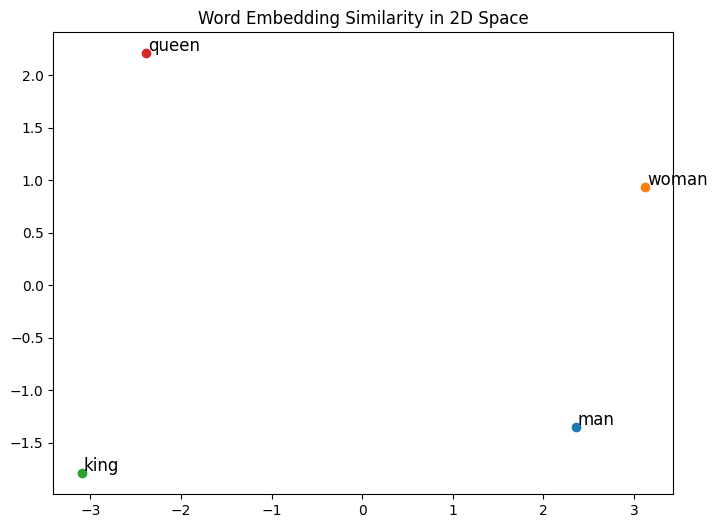

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader as api  # To download pre-trained word embeddings
from sklearn.manifold import TSNE

# Load a pre-trained Word2Vec model from Gensim
model = api.load("glove-wiki-gigaword-100")  # GloVe embeddings with 100 dimensions

# Function to compute cosine similarity between two word embeddings
def cosine_similarity_word(word1, word2):
    vec1 = model[word1]
    vec2 = model[word2]
    cosine_sim = cosine_similarity([vec1], [vec2])
    return cosine_sim[0][0]

# Function to get nearest neighbors of a word using cosine similarity
def get_nearest_neighbors(word, top_n=5):
    word_vector = model[word]
    similarities = {}

    for other_word in model.key_to_index:  # Iterate over all words in vocabulary
        if other_word != word:
            similarity = cosine_similarity([word_vector], [model[other_word]])[0][0]
            similarities[other_word] = similarity

    # Sort by highest similarity and return top N results
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Function to plot words in 2D space
def plot_words(word_list):
    word_vectors = np.array([model[word] for word in word_list])

    # Reduce dimensions to 2D using PCA or TSNE
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(8, 6))
    for i, word in enumerate(word_list):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1] + 0.02, word, fontsize=12)

    plt.title("Word Embedding Similarity in 2D Space")
    plt.show()

# Example: Find the nearest neighbors of 'man'
nearest_neighbors = get_nearest_neighbors('man', top_n=5)
print(f"Nearest neighbors of 'man': {nearest_neighbors}")

# Example: Find analogy 'man : king = woman : ?'
def analogy(word1, word2, word3):
    vec = model[word2] - model[word1] + model[word3]
    result = model.similar_by_vector(vec, topn=1)
    return result

result = analogy('man', 'king', 'woman')
print(f"man : king = woman : {result[0][0]}")

# Example: Plot 'man', 'woman', 'king', 'queen'
plot_words(['man', 'woman', 'king', 'queen'])


3) Pointwise Mutual Information (PMI): Use PMI when low co-occurances of words exists

In [ ]:
import numpy as np
from collections import defaultdict
import math

# Example corpus of documents (list of lists where each inner list is a document)
corpus = [
    ["car", "auto", "insurance", "best"],
    ["car", "insurance", "best"],
    ["auto", "insurance", "car"],
    ["insurance", "best", "auto"]
]

# Build word frequencies and co-occurrences
word_freq = defaultdict(int)
pair_freq = defaultdict(int)
total_word_count = 0

# Count word frequencies and co-occurrences
for doc in corpus:
    total_word_count += len(doc)
    for word in doc:
        word_freq[word] += 1
    for i, word_i in enumerate(doc):
        for j, word_j in enumerate(doc):
            if i != j:
                pair_freq[(word_i, word_j)] += 1

# Compute PMI
def compute_pmi(word_i, word_j):
    p_wi = word_freq[word_i] / total_word_count
    p_wj = word_freq[word_j] / total_word_count
    p_wi_wj = pair_freq[(word_i, word_j)] / total_word_count

    if p_wi_wj > 0:  # Avoid log of 0
        pmi = math.log(p_wi_wj / (p_wi * p_wj), 2)  # Using log base 2
        return pmi
    else:
        return 0  # No co-occurrence results in PMI = 0

# Compute PMI matrix
words = list(word_freq.keys())
pmi_matrix = np.zeros((len(words), len(words)))

for i, word_i in enumerate(words):
    for j, word_j in enumerate(words):
        if i != j:
            pmi_matrix[i, j] = compute_pmi(word_i, word_j)

# Print the PMI matrix
print("PMI Matrix:")
print(pmi_matrix)

# Example: Recalculate similarity score using PMI between 'car' and 'insurance'
car_idx = words.index("car")
insurance_idx = words.index("insurance")
pmi_car_insurance = pmi_matrix[car_idx, insurance_idx]
print(f"PMI between 'car' and 'insurance': {pmi_car_insurance}")



PMI Matrix:
[[0.         1.53051472 1.70043972 1.53051472]
 [1.53051472 0.         1.70043972 1.53051472]
 [1.70043972 1.70043972 0.         1.70043972]
 [1.53051472 1.53051472 1.70043972 0.        ]]
PMI between 'car' and 'insurance': 1.7004397181410922
